<a href="https://colab.research.google.com/github/chanukyabaratam/C-Program-to-Check-Whether-a-Number-is-Magic-Number-or-Not/blob/master/cartoon_effect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***TURN PHOTOS INTO CARTOONS USING PYTHON***

1.Load Image
2.Create edge mask
3.Reduce the color palette
4.Combine edge mask with the colored image



In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

**LOAD** **IMAGE**

In [2]:
def read_file(filename):
  img = cv2.imread(filename)
  cv2_imshow(img)
  return img

In [3]:
def color_quantization(img, k):
  # Transfrom the image
  data = np.float32(img).reshape((-1, 3))

  #Determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

  #Implementing K-Means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

**CREATE EDGE MASK**

In [4]:
def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

**Upload Image File**

Saving IMG-20200617-WA0009.jpg to IMG-20200617-WA0009.jpg


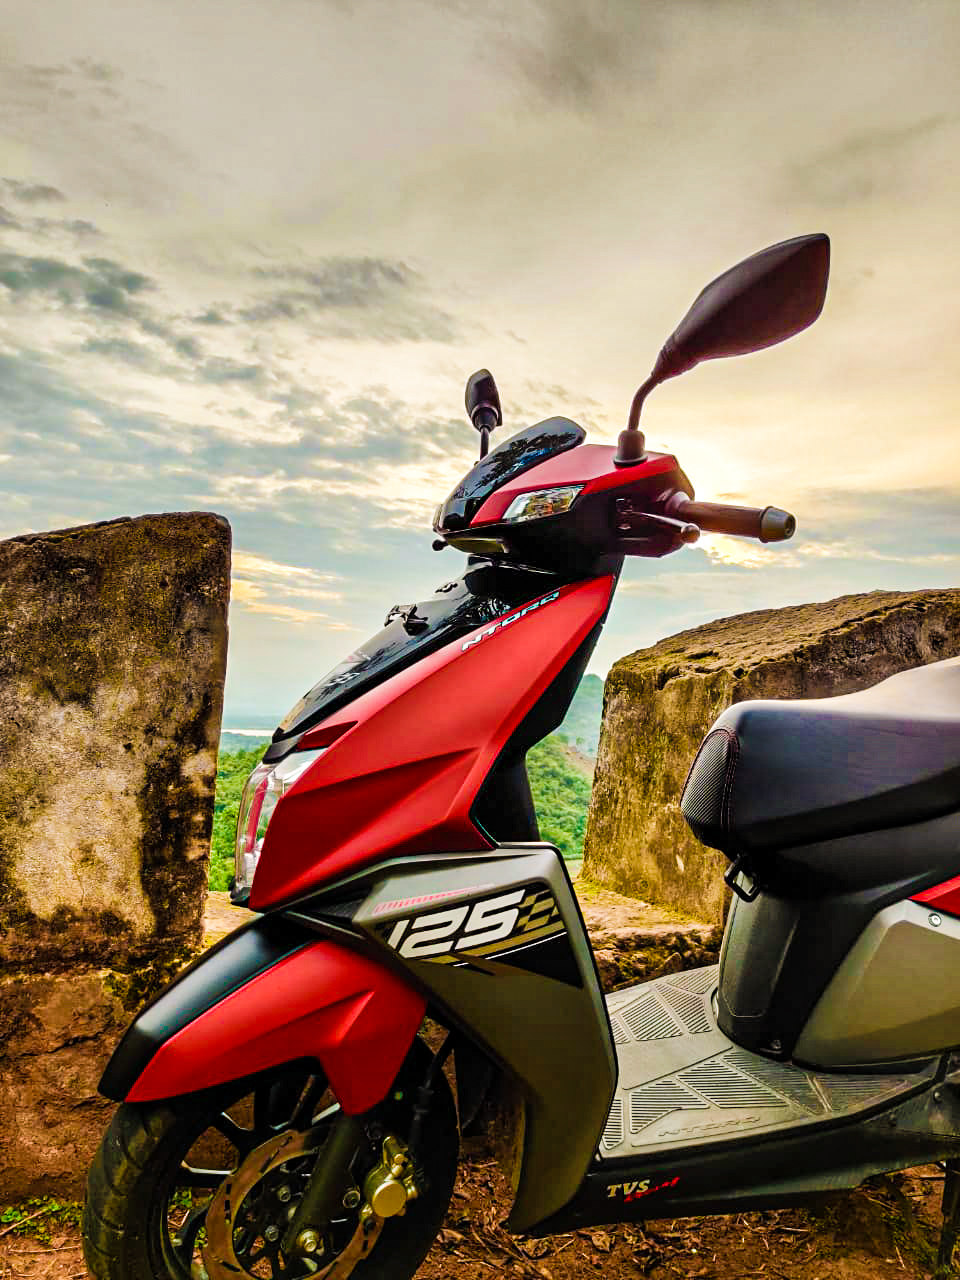

In [5]:
uploaded = files.upload()

filename = next(iter(uploaded))
img = read_file(filename)


**Create Cartoon Effect**

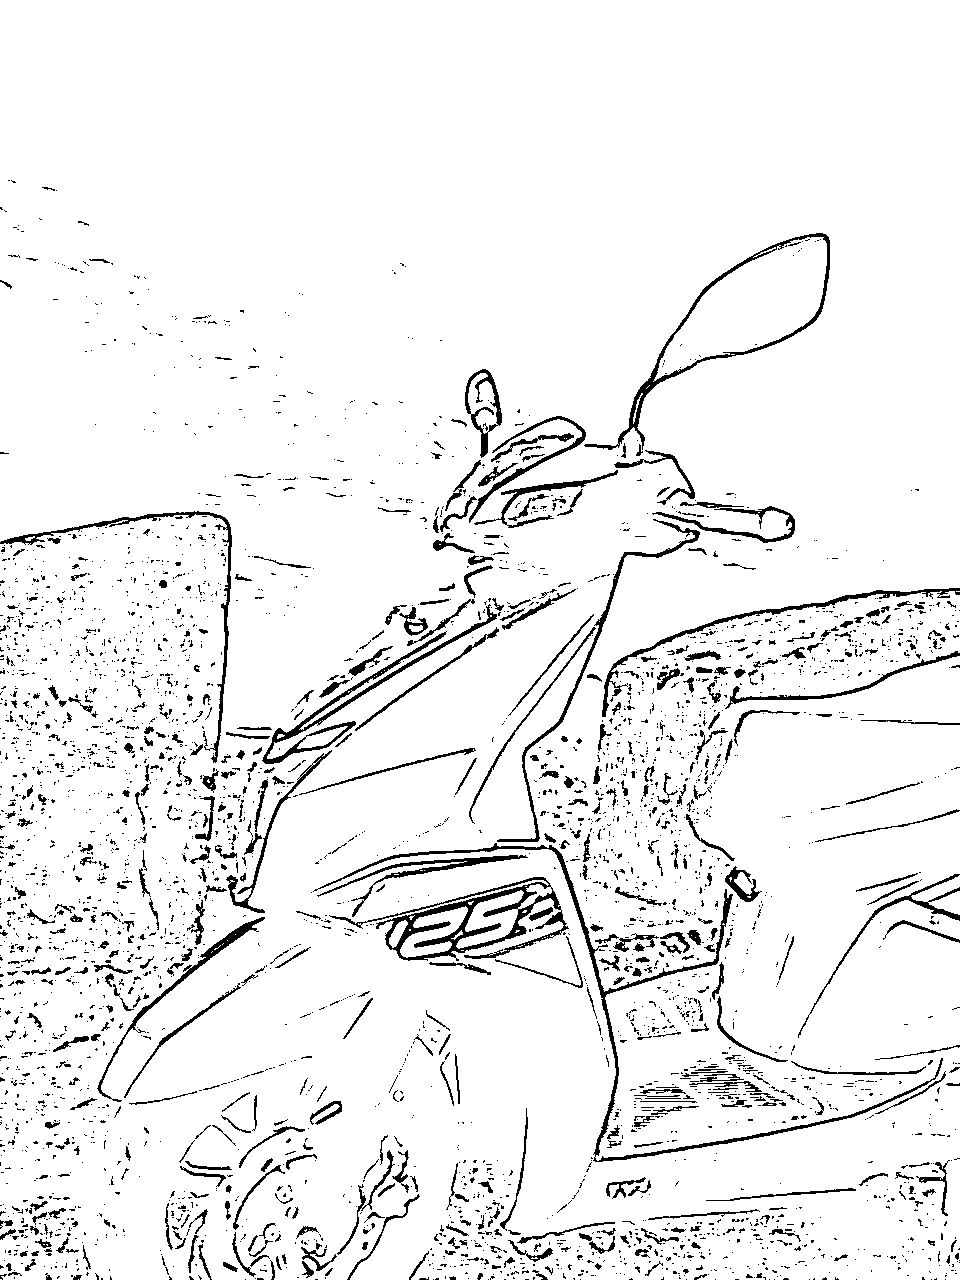

In [6]:
line_size = 7
blur_value = 7

edges = edge_mask(img, line_size, blur_value)
cv2_imshow(edges)

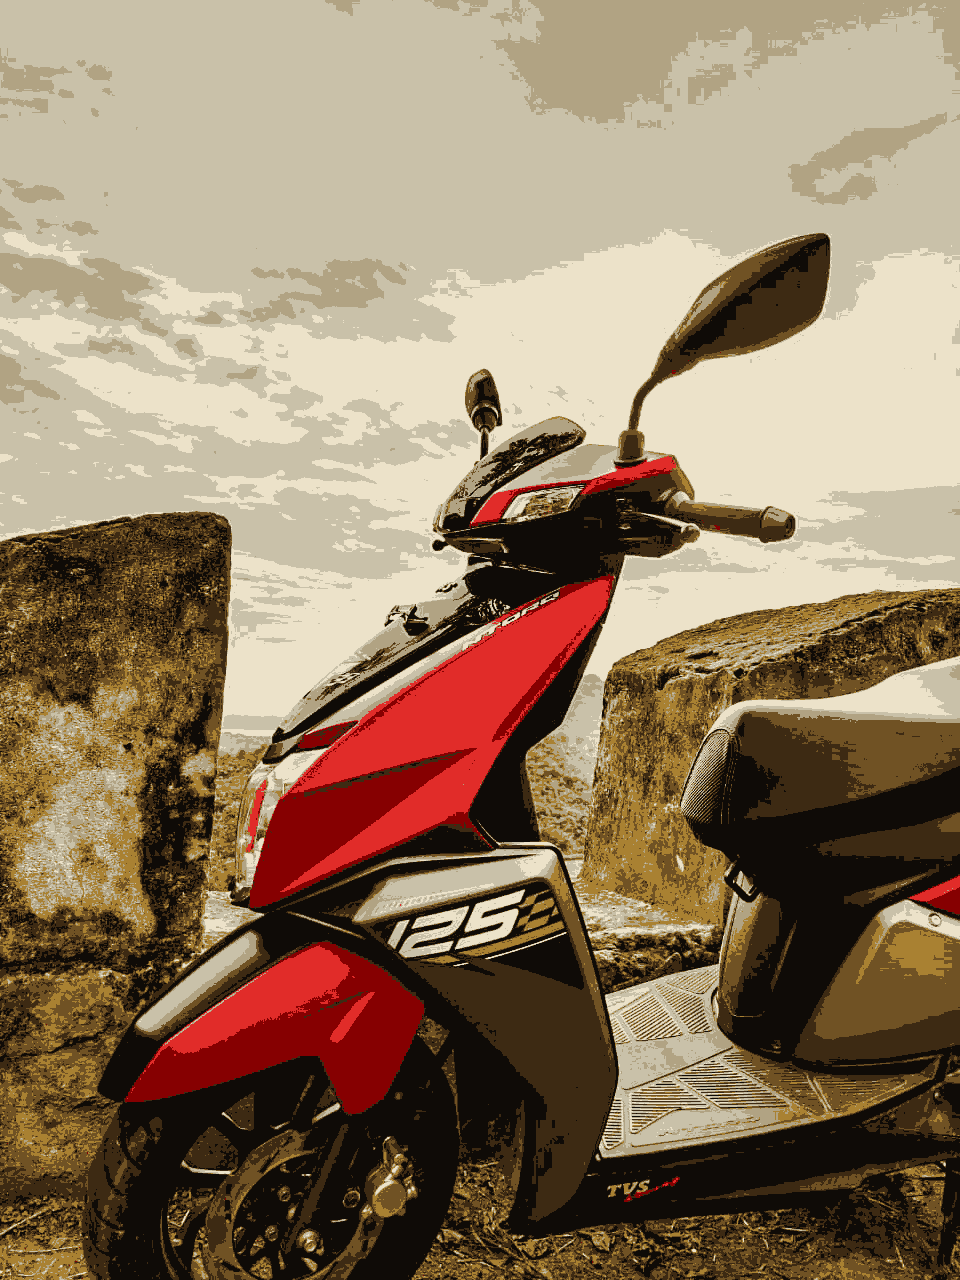

In [7]:
total_color = 9

img = color_quantization(img, total_color)
cv2_imshow(img)

**Bilateral Filter**

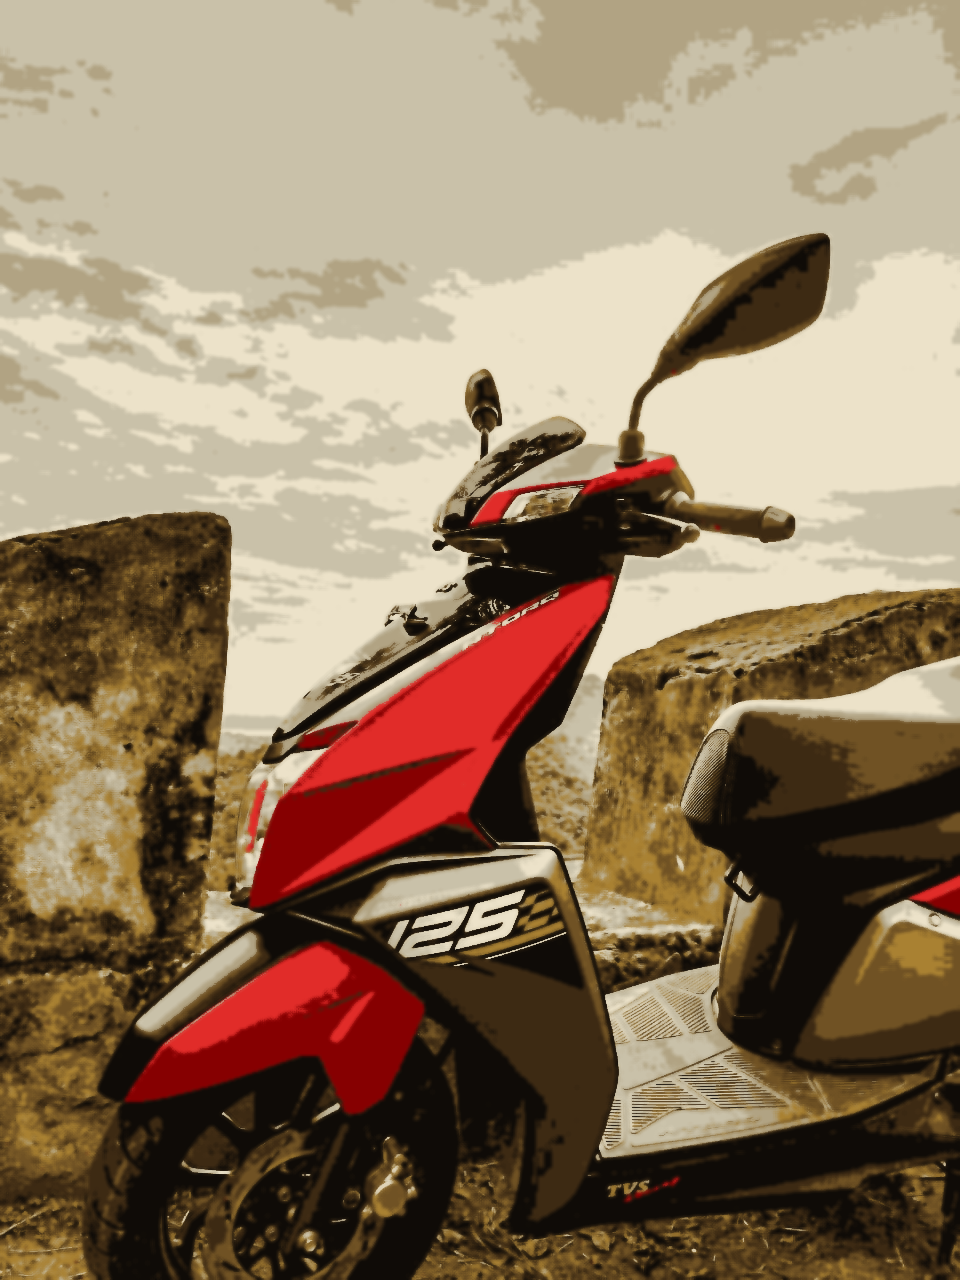

In [8]:
blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200,sigmaSpace=200)
cv2_imshow(blurred)

**Combine Edge Mask with the Colored Image**

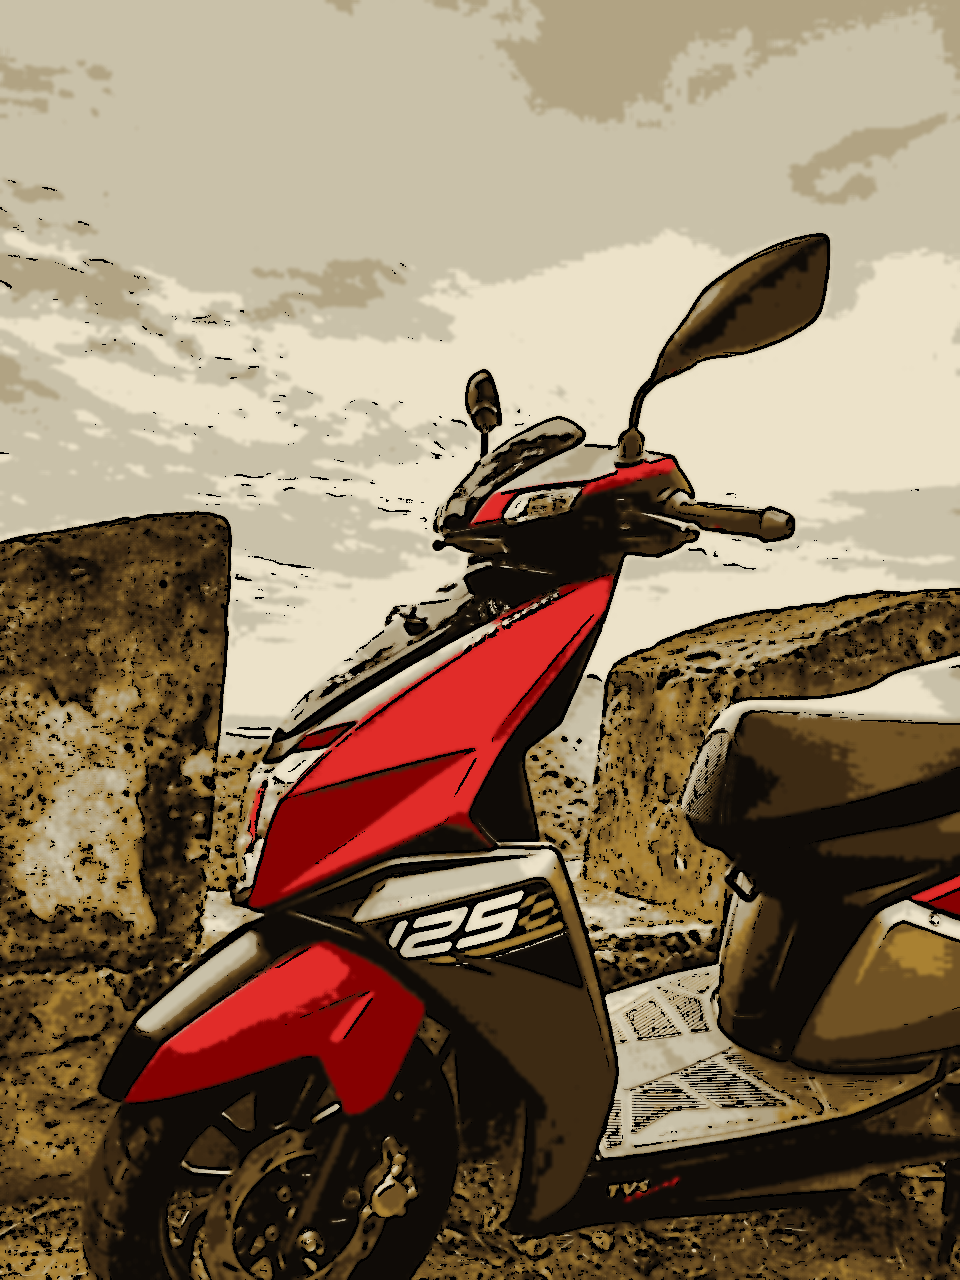

In [9]:
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
cv2_imshow(cartoon)